In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [4]:
ed_exp = pd.read_csv("Resources/SYB63_245_202009_Public_Expenditure_on_Education.csv")
ed_grad = pd.read_csv('Resources/EAG_GRAD_ENTR_RATES_06022021014126375.csv')
crm_prv = pd.read_csv('Resources/crime_prevelence-youth.csv')
crm_pers_held = pd.read_csv('Resources/crime_persons_held.csv')
crm_enter = pd.read_csv('Resources/crime_entering_prison.csv')

In [5]:
ed_exp=ed_exp.drop('Region/Country/Area',axis=1)

In [6]:
ed_exp=ed_exp.rename(columns={"Unnamed: 1":"Country"})

In [7]:
ed_exp=ed_exp.drop('Source',axis=1)

In [8]:
ed_exp=ed_exp.drop('Footnotes',axis=1)

In [9]:
ed_exp=ed_exp.rename(columns={"Value":"Value %"})

In [10]:
ed_exp=ed_exp.loc[ed_exp["Series"]=="Government expenditure on education (% of government expenditure)"]

In [11]:
ed_exp_mean=ed_exp.groupby("Country")["Value %"].mean()

In [12]:
ed_exp_mean=ed_exp_mean.reset_index()
ed_exp_mean

,Country,Value %
0,Afghanistan,15.079333
1,Albania,10.935840
2,Algeria,11.428400
3,Andorra,19.406100
4,Angola,8.044000
...,...,...
175,Vanuatu,25.239017
176,Viet Nam,16.699433
177,Yemen,21.405250
178,Zambia,12.508443


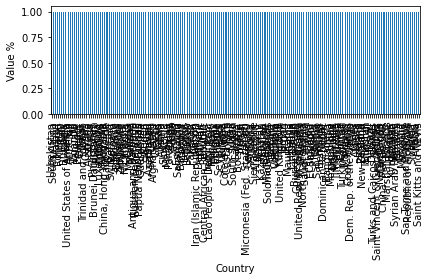

In [13]:
ed_exp_mean['Country'].value_counts().plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Value %')
plt.tight_layout()

In [20]:
top_exp = ed_exp_mean.sort_values(by='Value %',ascending=False)
top_10=top_exp.head(10)
top_10
#make country the index

,Country,Value %
175,Vanuatu,25.239017
164,Tunisia,24.483017
92,Lesotho,23.711100
174,Uzbekistan,23.338350
146,Singapore,23.229900
57,Ethiopia,23.196833
41,Costa Rica,23.192975
22,Botswana,23.150450
67,Guatemala,22.620025
85,Kenya,22.590600


In [21]:
bottom_exp = ed_exp_mean.sort_values(by='Value %')
bottom_10=bottom_exp.head(10)
bottom_10
#make country the index

,Country,Value %
151,South Sudan,2.052740
54,Eritrea,5.514467
107,Monaco,6.175060
93,Liberia,6.648650
91,Lebanon,7.066225
32,Central African Republic,7.960350
4,Angola,8.044000
13,Bahrain,8.108060
160,Timor-Leste,8.124550
165,Turkey,8.334350


Text(0, 0.5, 'Value %')

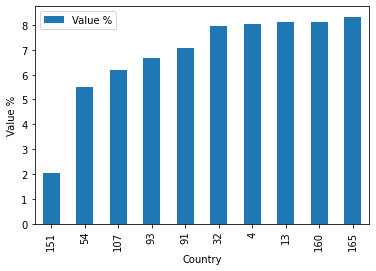

In [23]:
#adviced to separate bottom 10 from top 10 in bar graphs and do a histogram
bottom_10.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Value %')

Text(0, 0.5, 'Value %')

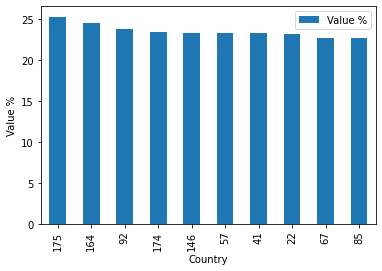

In [24]:
top_10.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Value %')